# Problem Statement

Customer Churn is a burning problem for Telecom companies. Almost every telecom company pays a premium to get a customer on-board. Customer churn is a directly impacts company’s revenue.
  
In this case-study, we simulate one such case of customer churn where we work on a data of post-paid customers with a contract. The data has information about customer usage behaviour, contract details, and payment details. The data also indicates which were the customers who cancelled their service.  
  
Based on this past data, Perform an EDA and build a model which can predict whether a customer will cancel their service in the future or not.

# Data Dictionary

* <b>Churn</b> - 1 if customer cancelled service, 0 if not
* <b>AccountWeeks</b> - number of weeks customer has had active account
* <b>ContractRenewal</b> - 1 if customer recently renewed contract, 0 if not
* <b>DataPlan</b> - 1 if customer has data plan, 0 if not
* <b>DataUsage</b> - gigabytes of monthly data usage
* <b>CustServCalls</b> - number of calls into customer service
* <b>DayMins</b> - average daytime minutes per month
* <b>DayCalls</b> - average number of daytime calls
* <b>MonthlyCharge</b> - average monthly bill
* <b>OverageFee</b> - largest overage fee in last 12 months
* <b>RoamMins</b> - average number of roaming minutes


In [94]:
#Import all necessary modules
import pandas as pd  
import numpy as np 
import scipy.stats as stats
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import scale

In [95]:
cell_df = pd.read_excel("Cellphone.xlsx")

## EDA

In [96]:
cell_df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,1,108.0,0.0,0.0,0.38,2.0,115.1,114.0,41.8,10.57,13.8
1,0,113.0,1.0,1.0,3.59,1.0,44.9,63.0,55.9,6.71,13.3
2,0,101.0,1.0,0.0,0.00,0.0,257.3,84.0,60.0,9.24,13.5
3,0,80.0,1.0,1.0,2.89,4.0,166.4,92.0,77.9,11.92,10.7
4,0,70.0,1.0,0.0,0.00,0.0,175.4,130.0,44.0,7.98,11.6


In [97]:
cell_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
Churn              3333 non-null int64
AccountWeeks       3303 non-null float64
ContractRenewal    3315 non-null float64
DataPlan           3324 non-null float64
DataUsage          3317 non-null float64
CustServCalls      3281 non-null float64
DayMins            3298 non-null float64
DayCalls           3322 non-null float64
MonthlyCharge      3320 non-null float64
OverageFee         3309 non-null float64
RoamMins           3326 non-null float64
dtypes: float64(10), int64(1)
memory usage: 286.5 KB


There are missing values in some coumns.  
All variables are of numeric type and does not contain any data inconsistencies (causing numeric variables to be object due to some special characters present in the data).  
Churn is the target variable.   
Churn, ContractRenewal and DataPlan are binary variables.

In [98]:
cell_df.describe()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3303.000000,3315.000000,3324.000000,3317.000000,3281.000000,3298.000000,3322.000000,3320.000000,3309.000000,3326.000000
mean,0.144914,101.159552,0.902866,0.276474,0.814827,1.563852,179.863069,100.434377,56.288735,10.048598,10.237974
std,0.352067,39.879736,0.296185,0.447321,1.270329,1.318590,54.581440,20.079248,16.438343,2.539063,2.793192
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,0.000000,101.000000,1.000000,0.000000,0.000000,1.000000,179.600000,101.000000,53.500000,10.070000,10.300000
75%,0.000000,127.000000,1.000000,1.000000,1.780000,2.000000,216.700000,114.000000,66.125000,11.770000,12.100000
max,1.000000,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


### Check for Missing values

In [99]:
cell_df.isnull().sum()

Churn               0
AccountWeeks       30
ContractRenewal    18
DataPlan            9
DataUsage          16
CustServCalls      52
DayMins            35
DayCalls           11
MonthlyCharge      13
OverageFee         24
RoamMins            7
dtype: int64

### Imputing missing values

Since, ContractRenewal and DataPlan are binary, we can't susbtitute with mean values for these 2 variables.  
Mean and Median are almost same, and so we will impute median inplace of the missing values

In [100]:
for column in cell_df.columns:
    median = cell_df[column].median()
    cell_df[column] = cell_df[column].fillna(median)    
        
cell_df.isnull().sum()        

Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64

### Checking for Duplicates

In [101]:
# Are there any duplicates ?
dups = cell_df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
#df[dups]

Number of duplicate rows = 0


### Proportion in the Target classes

In [102]:
cell_df.Churn.value_counts(normalize=True)

0    0.855086
1    0.144914
Name: Churn, dtype: float64

### Outlier Checks

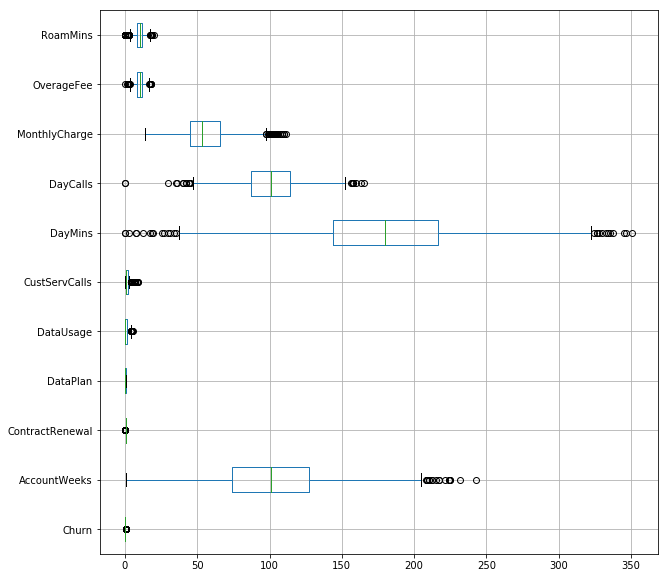

In [103]:
plt.figure(figsize=(10,10))
cell_df.boxplot(vert=0)

Although outliers exists as per the boxplot, by looking at the data distribution in describe(), the values are not too far away. 
Treating the outliers by converting them to min/max values will cause most variables to have values to be the same. So, outliers are not treated in this case

### Bi-Variate Analysis with Target variable

Converting Churn into an Object

In [104]:
cell_df.Churn= cell_df.Churn.astype(object) 

In [105]:
cell_df.Churn.value_counts()

0    2850
1     483
Name: Churn, dtype: int64

Converting Contract Renewal and Data Plan into Object

In [106]:
cell_df.ContractRenewal=cell_df.ContractRenewal.astype(object)
cell_df.DataPlan=cell_df.DataPlan.astype(object)

In [107]:
cell_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
Churn              3333 non-null object
AccountWeeks       3333 non-null float64
ContractRenewal    3333 non-null object
DataPlan           3333 non-null object
DataUsage          3333 non-null float64
CustServCalls      3333 non-null float64
DayMins            3333 non-null float64
DayCalls           3333 non-null float64
MonthlyCharge      3333 non-null float64
OverageFee         3333 non-null float64
RoamMins           3333 non-null float64
dtypes: float64(8), object(3)
memory usage: 286.5+ KB


<b>Account Weeks and Churn</b>

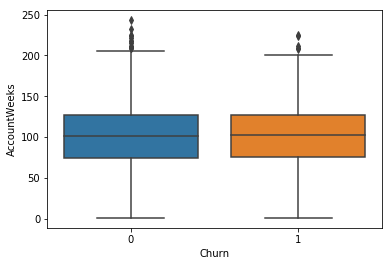

In [108]:
sns.boxplot(cell_df['Churn'],cell_df['AccountWeeks'])

AccountWeeks shows similar distribution between churn and no churn, and is normally distributed

<b>Data Usage against Churn</b>

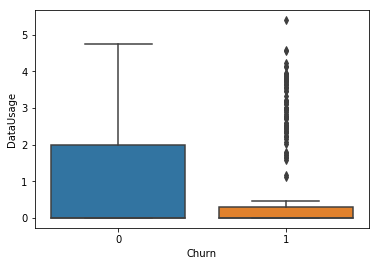

In [109]:
sns.boxplot(cell_df['Churn'],cell_df['DataUsage'])

DataUsage shows clear distinction between churn and no churn. Customers who has not churned shows a wider distribution indicating more data usage. Whereas customers who has churned has smaller distribution (mostly near data usage 0) with many outliers indicating few customers who has more data usage still has churned

<b>DayMins against Churn</b>

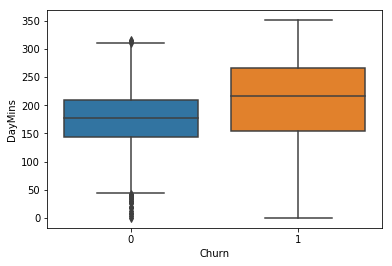

In [110]:
sns.boxplot(cell_df['Churn'],cell_df['DayMins'])

DayMins shows distinction between churn and no churn, and both are normally distributed with little skewness. Distribution is much wider for churn than no churn

<b>DayCalls against Churn</b>

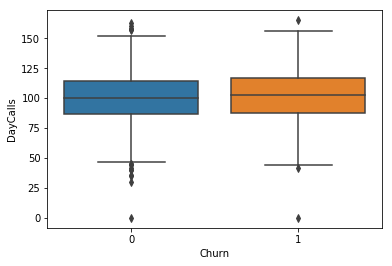

In [111]:
sns.boxplot(cell_df['Churn'],cell_df['DayCalls'])

DayCalls shows similar distribution between churn and no churn, and is normally distributed

<b>MonthlyCharge against Churn</b>

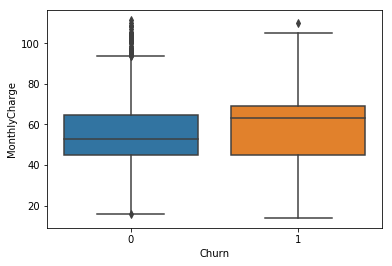

In [112]:
sns.boxplot(cell_df['Churn'],cell_df['MonthlyCharge'])

MonthlyCharge shows some skewness in the distribution between churn and no churn. Distribution is much wider for churn indicating more monthly charge means more churn. Median of churn is higher than no churn

<b>OverageFee against Churn</b>

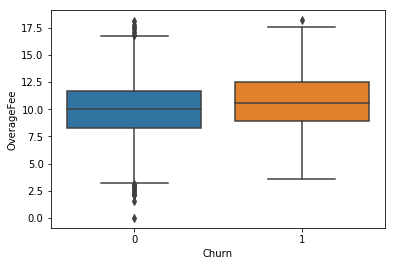

In [113]:
sns.boxplot(cell_df['Churn'],cell_df['OverageFee'])

Distribution is almost similar between churn and no churn

<b>RoamMins against Churn</b>

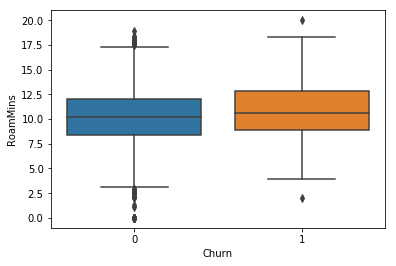

In [114]:
sns.boxplot(cell_df['Churn'],cell_df['RoamMins'])

Distribution is almost similar between churn and no churn. Medians are almost same

<b>CustServCalls against Churn</b>

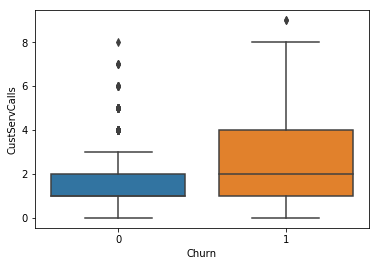

In [115]:
sns.boxplot(cell_df['Churn'],cell_df['CustServCalls'])

Distribution much wider for churn and lesser for no churn. More CustServCalls indicates more churn.

<b>Contract Renewal against Churn</b>

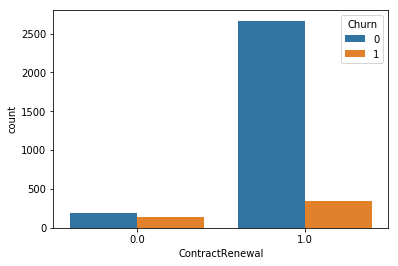

In [116]:
sns.countplot(cell_df['ContractRenewal'],hue=cell_df['Churn'])

The contract renewal is totally opposite to the churn as the churn value of 0 shows that the user not cancelled the service whereas the contract renewal of value 0 shows that user has not renewed the contract.  
When customers has not renewed the contract, count of churn and no churn is almost same.  
More customers who has renewed the contract has not churned.

<b>Data Plan against Churn</b>

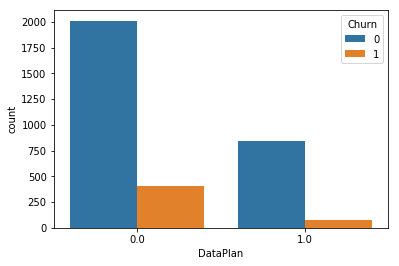

In [117]:
sns.countplot(cell_df['DataPlan'],hue=cell_df['Churn'])
#pd.crosstab(cell_df['DataPlan'],cell_df['Churn']).plot(kind='bar')

Very few people have opted for having a data plan. Almost one-fifth of the customers have churned irrespective of having a data plan nor not. There isn't any significant difference between churn and no churn here.

### LDA Model

In [118]:
# Converting Churn to Integer
cell_df.Churn= cell_df.Churn.astype(int) 

In [119]:
# Copy all the predictor variables into X dataframe
X = cell_df.drop('Churn', axis=1)
X = np.asmatrix(X)
#Scale X
X = scale(X)

# Copy target into the y dataframe. 
y = np.asarray(cell_df[['Churn']])

C:\Users\Win10\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [120]:
#Build LDA Model
clf = LinearDiscriminantAnalysis()
model=clf.fit(X,y)
model

C:\Users\Win10\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

### Prediction

In [121]:
# Predict it
pred_class = model.predict(X)
cell_df['Prediction'] = pred_class 
cell_df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins,Prediction
0,1,108.0,0,0,0.38,2.0,115.1,114.0,41.8,10.57,13.8,1
1,0,113.0,1,1,3.59,1.0,44.9,63.0,55.9,6.71,13.3,0
2,0,101.0,1,0,0.00,0.0,257.3,84.0,60.0,9.24,13.5,0
3,0,80.0,1,1,2.89,4.0,166.4,92.0,77.9,11.92,10.7,0
4,0,70.0,1,0,0.00,0.0,175.4,130.0,44.0,7.98,11.6,0


In [122]:
#generate Confusion Matrix
confusion_matrix(y, pred_class)

array([[2721,  129],
       [ 362,  121]], dtype=int64)

In [123]:
model.score(X,y)

0.8526852685268527

In [124]:
from sklearn.metrics import classification_report
print(classification_report(y, pred_class))

              precision    recall  f1-score   support

           0       0.88      0.95      0.92      2850
           1       0.48      0.25      0.33       483

   micro avg       0.85      0.85      0.85      3333
   macro avg       0.68      0.60      0.62      3333
weighted avg       0.82      0.85      0.83      3333



# Conclusion

The model accuracy is 85%, which is the same value as the number of class 0 observations in the dataset. The higher precision and lower recall value supports this statement. i.e model is only able to correctly predict 25% of the class 1 cases . This confirms the model is affected by class imbalance problem.
Since, we have only 3333 observations, if re-build the same LDA model with more number of data, an even better model could be built.  
Alternatively, Logistic Regression and Random Forest can also be used on this dataset to build the predictive model and chose the model which gives a better performance result.